In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mouse_drug_data = 'data/mouse_drug_data.csv'
clinical_trial_data = 'data/clinicaltrial_data.csv'

mouse_drug_df = pd.read_csv(mouse_drug_data)
clinical_trial_df = pd.read_csv(clinical_trial_data)

combined_df = pd.merge(mouse_drug_df, clinical_trial_df, on='Mouse ID')

combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


# Tumour Response to Treatment

In [3]:
tr_df1 = combined_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tr_df1 = tr_df1.groupby(['Drug', 'Timepoint'])
tr_df1.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713
5,Stelasyn,25,52.178602
6,Stelasyn,30,56.873817
7,Stelasyn,35,57.748758
8,Stelasyn,0,45.000000
9,Stelasyn,5,46.327570


In [4]:
tr_df_sem = tr_df1.sem().pivot_table('Tumor Volume (mm3)', 'Timepoint', 'Drug')

tr_df_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [5]:
tr_df2 = combined_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tr_df2 = tr_df2.pivot_table('Tumor Volume (mm3)', 'Timepoint', 'Drug')

tr_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


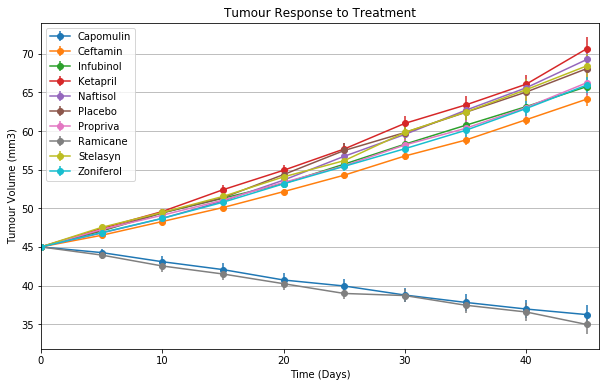

In [6]:
tr_plot = tr_df2.plot(marker='o', yerr=tr_df_sem, title='Tumour Response to Treatment', figsize=(10,6))
plt.legend(loc='upper left')
plt.grid(axis='y', which='major')
tr_plot.set_xlim(0, 46)
tr_plot.set_xlabel('Time (Days)')
tr_plot.set_ylabel('Tumour Volume (mm3)')

plt.savefig('visuals/TumourResponsetoTreatment.png')

# Metastatic Response to Treatment

In [7]:
mr_df1 = combined_df[['Drug', 'Timepoint', 'Metastatic Sites']]
mr_df1 = mr_df1.groupby(['Drug', 'Timepoint'])
mr_df1.head()

,Drug,Timepoint,Metastatic Sites
0,Stelasyn,0,0
1,Stelasyn,5,0
2,Stelasyn,10,0
3,Stelasyn,15,1
4,Stelasyn,20,2
5,Stelasyn,25,2
6,Stelasyn,30,2
7,Stelasyn,35,2
8,Stelasyn,0,0
9,Stelasyn,5,1


In [8]:
mr_df_sem = mr_df1.sem().pivot_table('Metastatic Sites', 'Timepoint', 'Drug')

mr_df_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [9]:
mr_df2 = combined_df[['Drug', 'Timepoint', 'Metastatic Sites']]
mr_df2 = mr_df2.pivot_table('Metastatic Sites', 'Timepoint', 'Drug')

mr_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


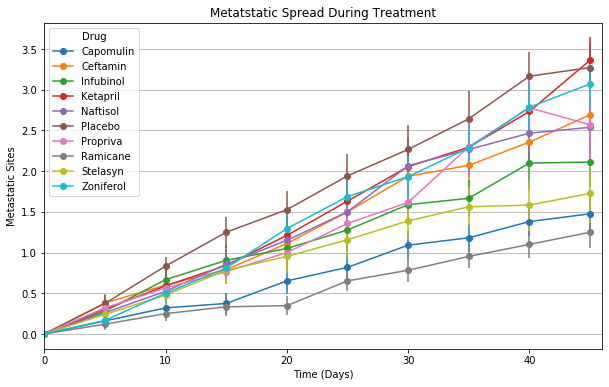

In [10]:
mr_plot = mr_df2.plot(marker='o', yerr=mr_df_sem, title='Metatstatic Spread During Treatment', figsize=(10,6))
plt.grid(axis='y', which='major')
mr_plot.set_xlim(0, 46)
mr_plot.set_xlabel('Time (Days)')
mr_plot.set_ylabel('Metastatic Sites')

plt.savefig('visuals/MetastaticSpreadDuringTreatment.png')

# Survival Rates

In [11]:
sr_df1 = combined_df[['Drug', 'Timepoint', 'Mouse ID']]
sr_df1 = sr_df1.groupby(['Drug', 'Timepoint'])
mouse_count = sr_df1['Mouse ID'].count()
sr_df2 = pd.DataFrame(mouse_count).reset_index()

sr_df2.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
sr_df2 = sr_df2.pivot_table('Mouse ID', 'Timepoint', 'Drug')

sr_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


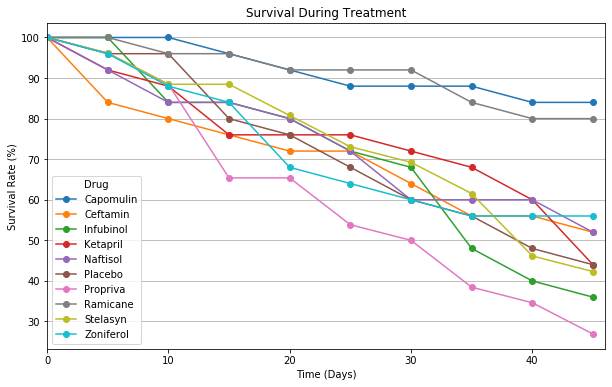

In [13]:
sr_plot = (sr_df2 / sr_df2.iloc[0] * 100).plot(marker='o', title='Survival During Treatment', figsize=(10,6))
plt.grid(axis='y', which='major')
sr_plot.set_xlim(0, 46)
sr_plot.set_xlabel('Time (Days)')
sr_plot.set_ylabel('Survival Rate (%)')

plt.savefig('visuals/SurvivalDuringTreatment.png')

# Summary Bar Graph

In [14]:
start_t = tr_df2.iloc[0] 
end_t = tr_df2.iloc[9]

per_change = pd.DataFrame(round(((end_t - start_t) / start_t * 100),2))
per_change

,0
Drug,
Capomulin,-19.48
Ceftamin,42.52
Infubinol,46.12
Ketapril,57.03
Naftisol,53.92
Placebo,51.30
Propriva,47.24
Ramicane,-22.32
Stelasyn,52.09


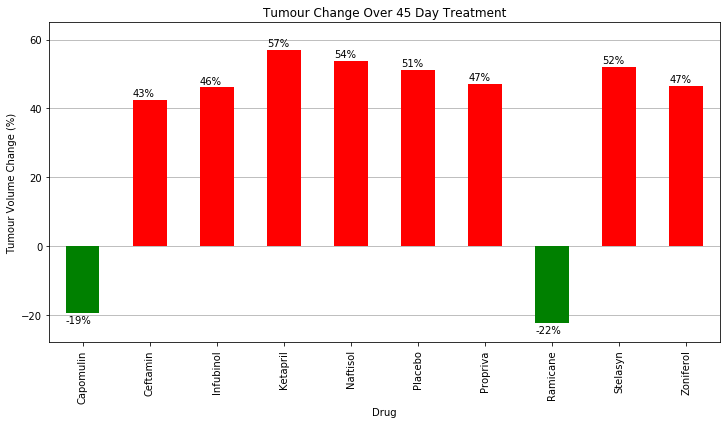

In [15]:
tc_bar = per_change.plot(kind='bar', title='Tumour Change Over 45 Day Treatment', figsize=(10,6),
                        color=[np.where(per_change[0]<0, 'green', 'red')])
plt.grid(axis='y', which='major')
plt.tight_layout()
tc_bar.set_ylim(-28, 65)
tc_bar.get_legend().remove()
tc_bar.set_ylabel('Tumour Volume Change (%)')
tc_bar.set_axisbelow(True)

for p in tc_bar.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        tc_bar.annotate('{:.0%}'.format(height/100), (x, y + height + 1))
    else:
        tc_bar.annotate('{:.0%}'.format(height/100), (x, y + height - 3))

plt.savefig('visuals/TumourChangeOverTreatment.png')